# Red Wine Quality Project

### Red wine has been part of social, religious, and cultural events for hundreds of years. Medieval monasteries believed that their monks lived longer partly because of their regular, moderate drinking of wine.
![Red Wine](https://booleanhunter.com/blog/using-data-science-to-understand-what-makes-wine-taste-good/index.png)

### The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

# The goal is to predict the quality given those physicochemical attributes. 

# Importing Libraries

In [2]:
#Importing required packages.

import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns


#feature engineering

from sklearn.preprocessing import StandardScaler, LabelEncoder

#train test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#metrics
from sklearn.metrics import confusion_matrix, classification_report

#ML models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

%matplotlib inline

# Importing Dataset and Data Information

In [3]:
#Loading dataset
wine = pd.read_csv('winequality-red.csv')

#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


    -no missing values

In [6]:
# checking unique elements for each column

wine.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [90]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [91]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

    - This is a classification problem since the target variable/label column has categorical type of data.

In [7]:
# Checking the '0' values in the dataset

(wine==0).sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

    Citric Acid has 132 values of '0'

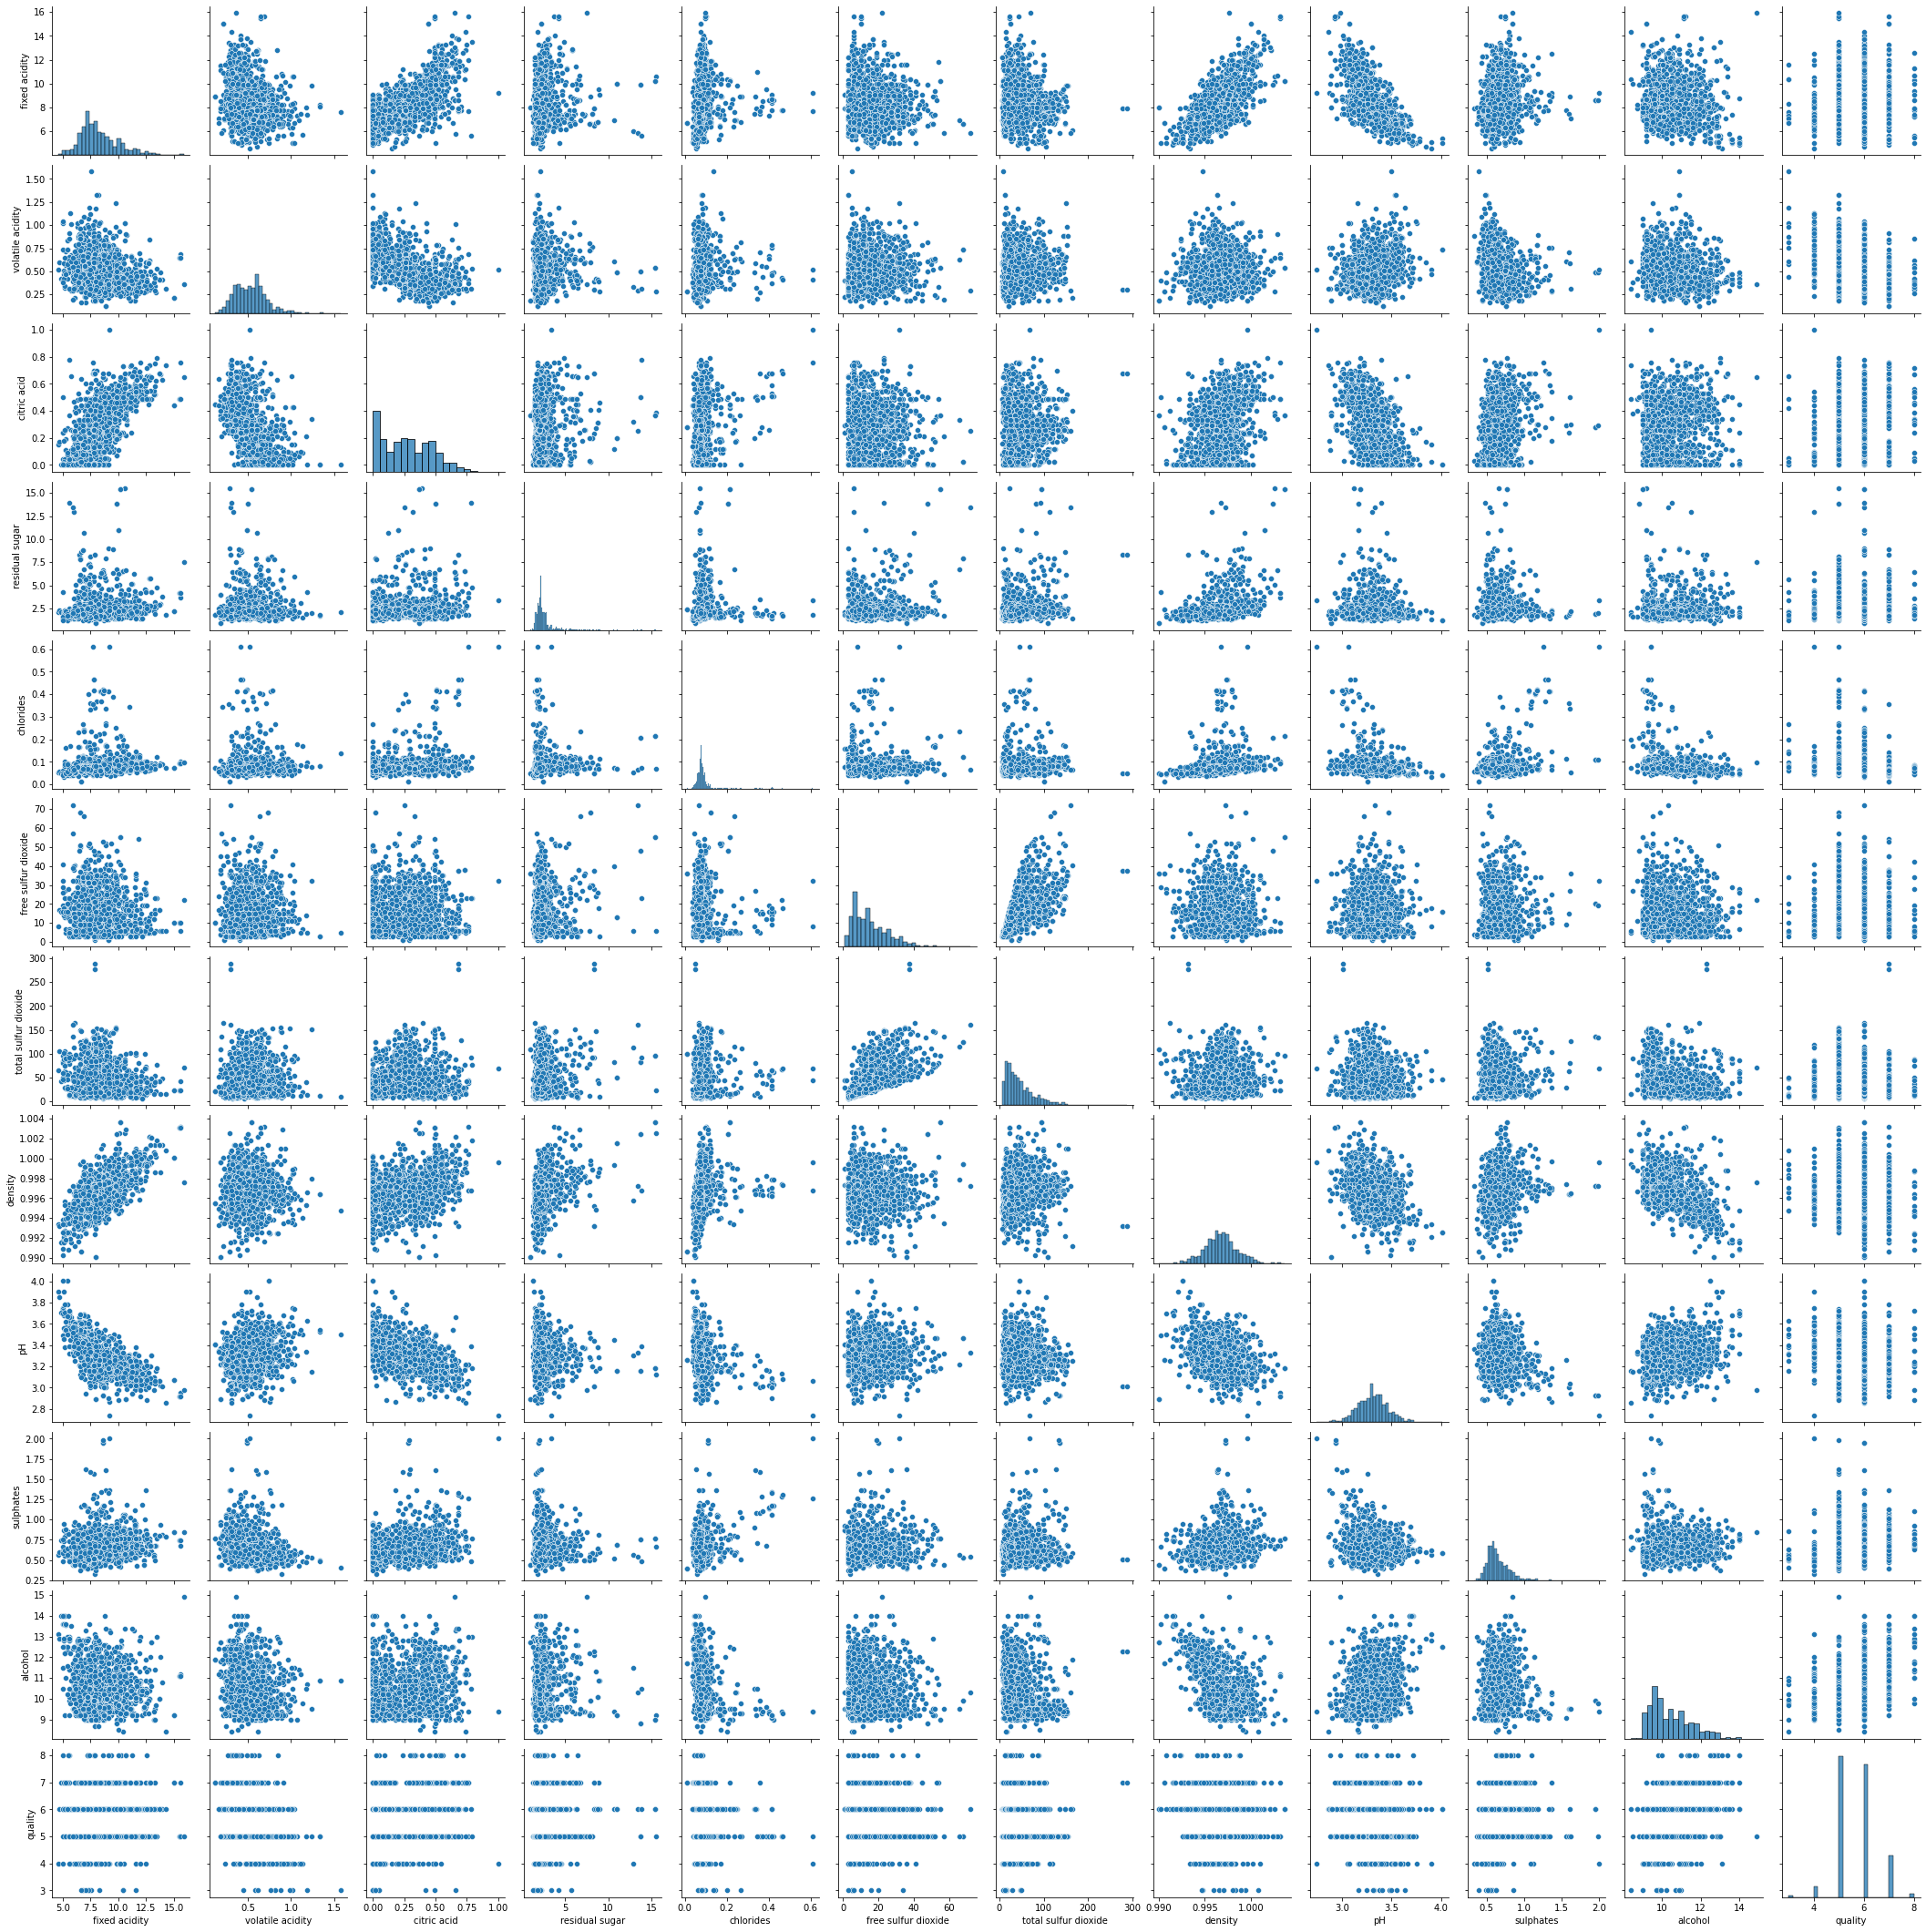

In [92]:
#Check correleation between the variables using Seaborn's pairplot. 
sns.pairplot(wine)


    -No correlation between the fields as seen on the pairplot

In [8]:
# Checking relationship between Dependent and Independent variables
x = wine.drop(columns = ['quality'])
y = wine['quality']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

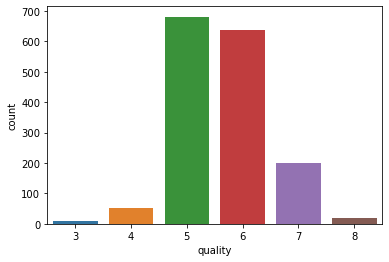

In [9]:
# Checking for class imbalance

sns.countplot(wine['quality'])

    - Class 5,6 carry the most of values and 3,4,7,8 carry minimal values.

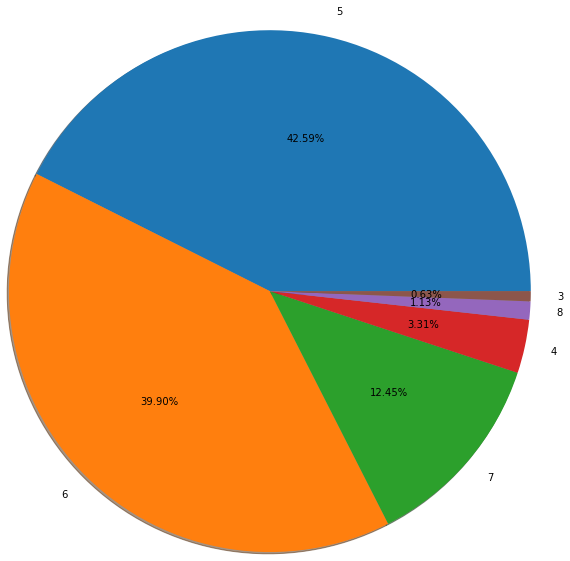

In [10]:
labels = '5','6','7','4','8','3'

fig, ax = plt.subplots()

ax.pie(wine['quality'].value_counts(),labels = labels,radius = 3, autopct = '%1.2f%%', shadow = True)

plt.show()

#### With the help of above chart and graph we can understand that all values falls under 5 or below 5 those are in not good category however for those falling grater than 5 is "Good" category.
### Good is encoding with '1' and not good '0'

In [11]:
wine['quality'] = np.where((wine['quality'] <=5),0,1)
wine['quality'].unique()

array([0, 1])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

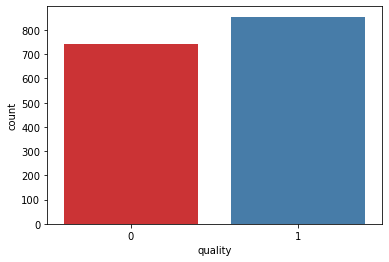

In [13]:
sns.countplot(wine['quality'], palette = "Set1")

    -Class '1' has 6.94% more values than class'0', now there is not any substantial inbalance in data distribution between the 2 classes.

# Data Visualization

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

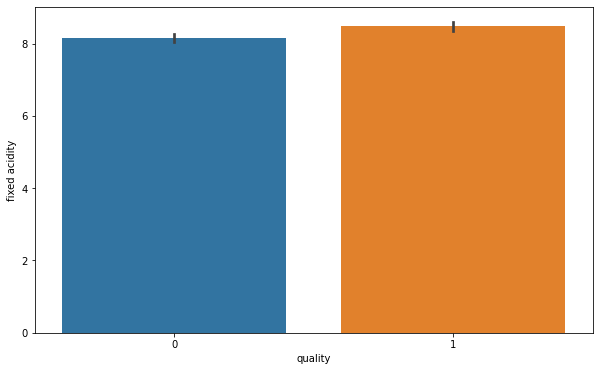

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

### Here we see that fixed acidity does not give any specification to classify the quality.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

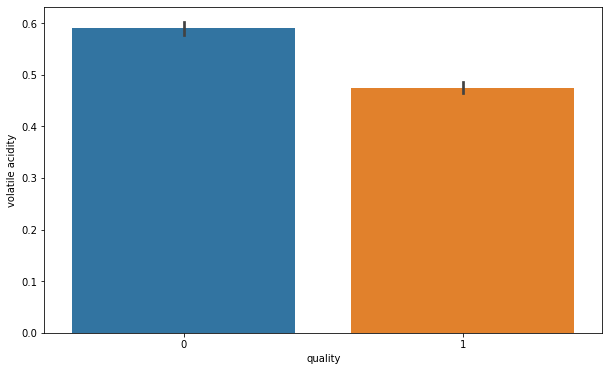

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

### Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

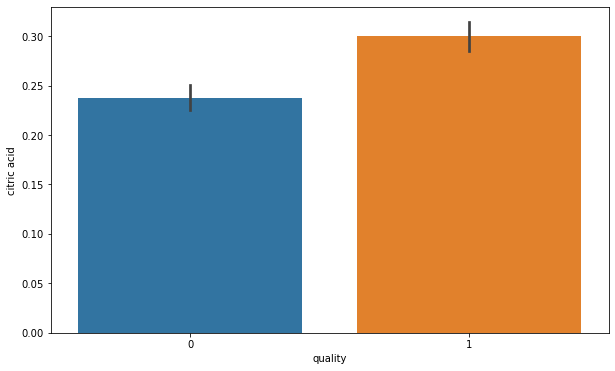

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

### Composition of citric acid go higher as we go higher in the quality of the wine

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

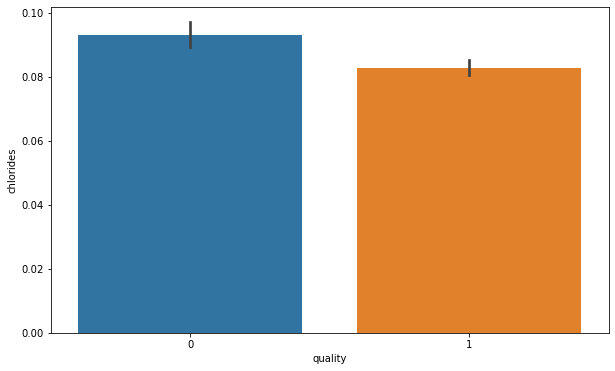

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

### Composition of chloride also go down as we go higher in the quality of the wine

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

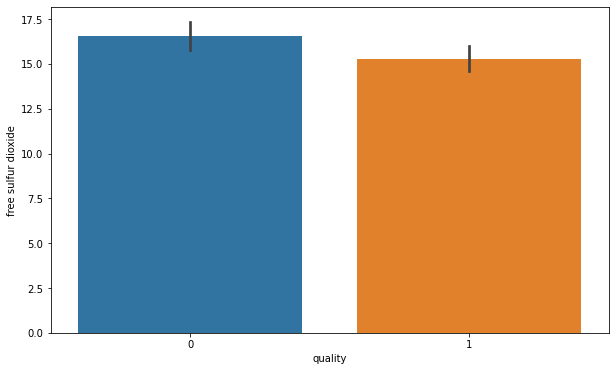

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

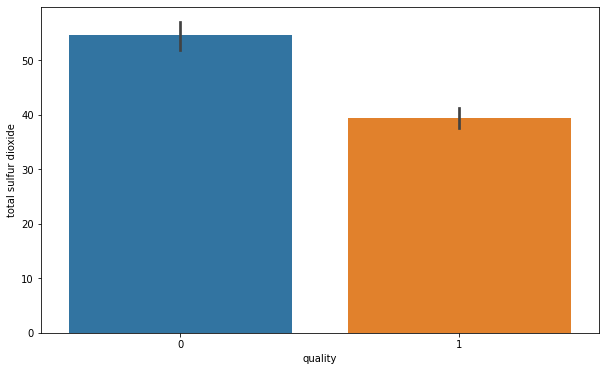

In [19]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

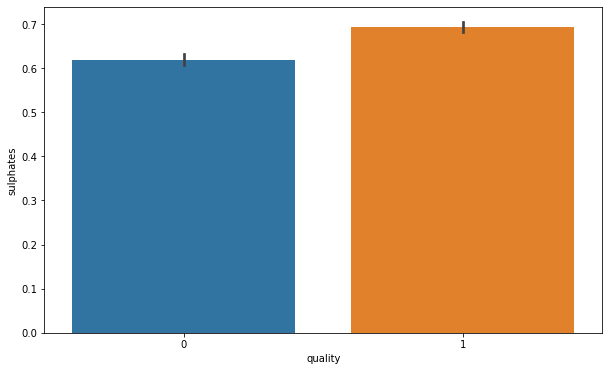

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

### Sulphates level goes higher with the quality of wine

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

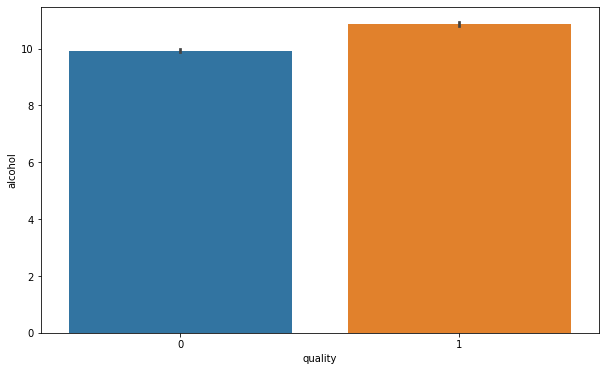

In [21]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

### Alcohol level also goes higher as te quality of wine increases

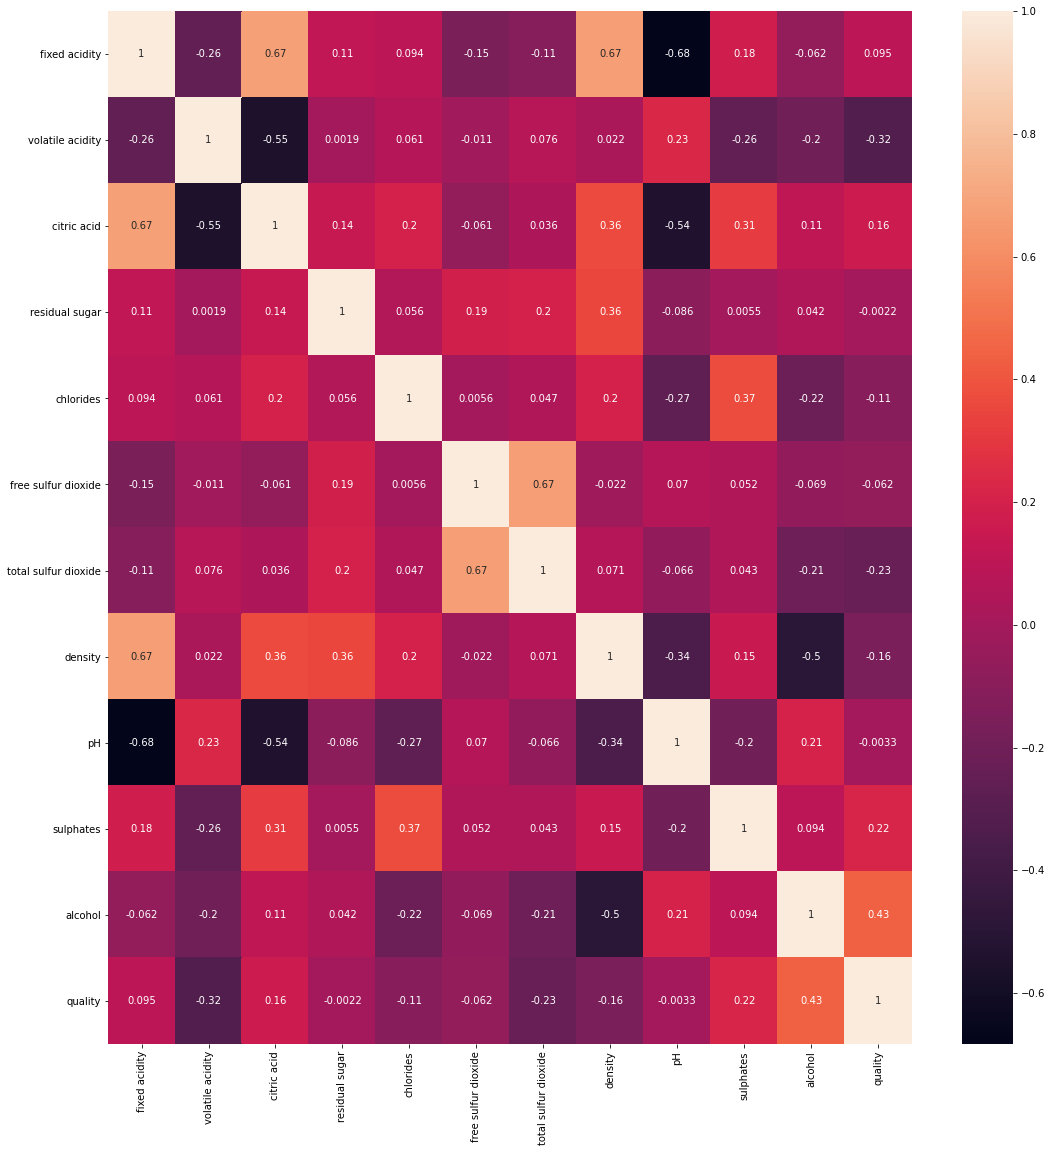

In [22]:
# heat map
plt.figure(figsize = (18,19))
sns.heatmap(wine.corr(),annot = True)
plt.show()

       -Feature like 'Alcohol','Sulphates' have a good positive correlation with 'quality' while 'volatile acidity' 'total sulfur dioxide' have a significiant negative correlation with 'quality'.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

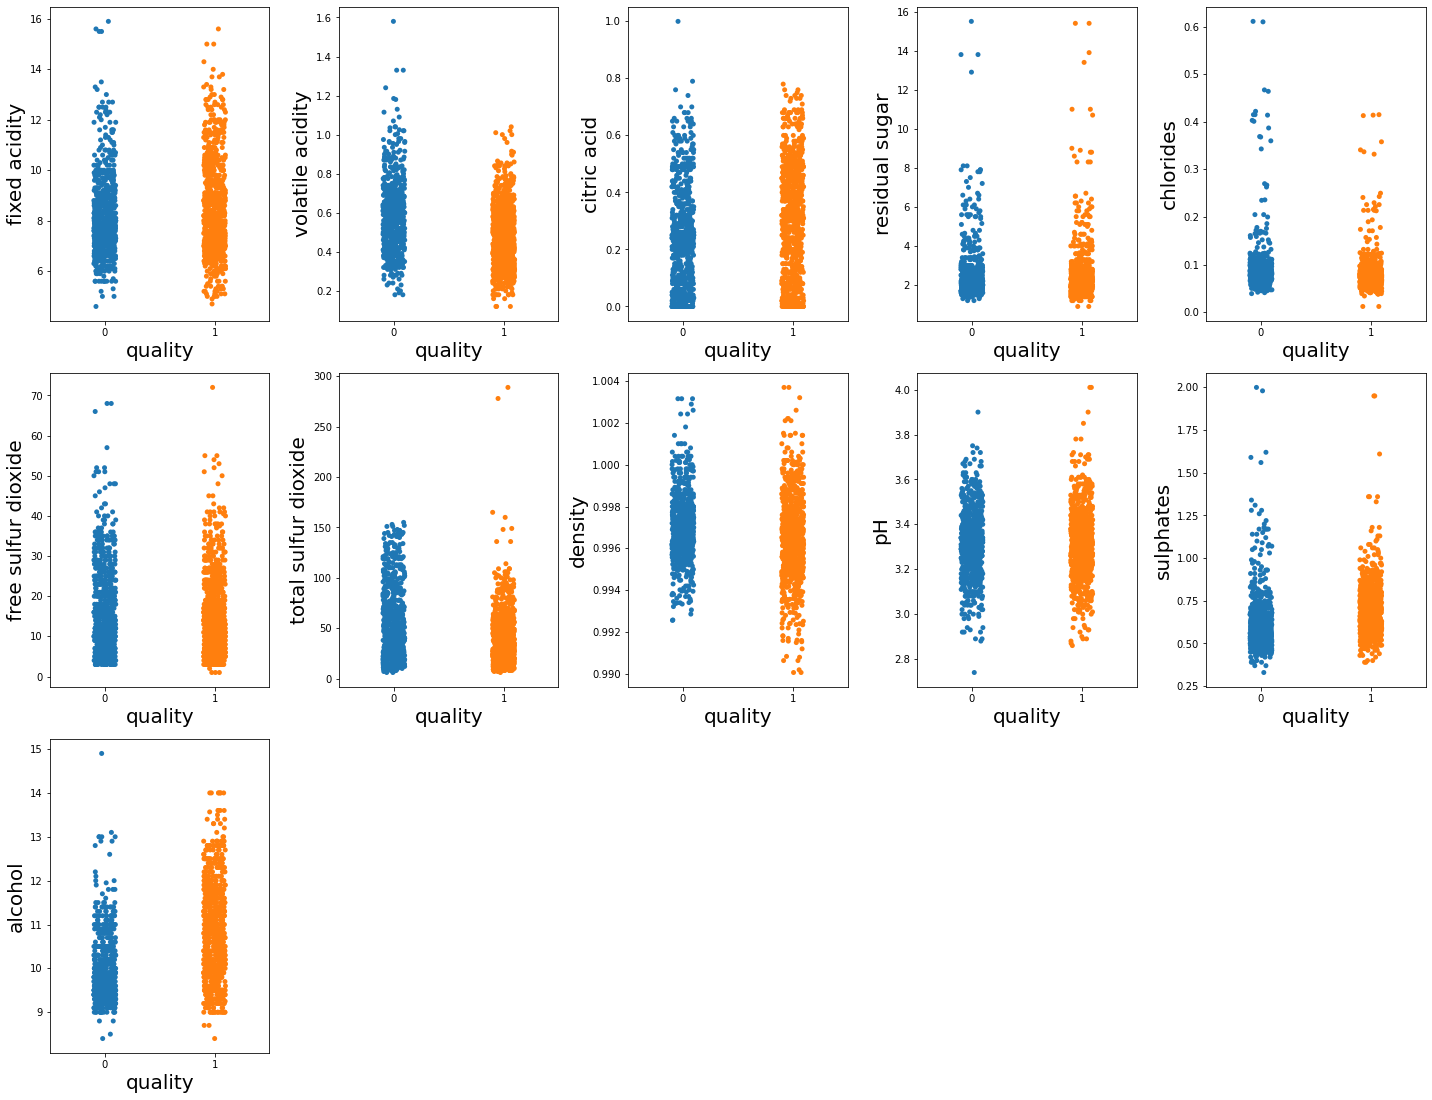

In [23]:
#interpreting relationship between independent variables and dependent class
plt.figure(figsize = (20,25), facecolor = 'white')
plotnum = 1

y = wine['quality']
for col in x:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.stripplot(y,x[col])
        plt.xlabel('quality',fontsize = 20)
        plt.ylabel(col, fontsize = 20)
    plotnum+=1
plt.tight_layout()

    -From the above graph it can understanable that "Alcohol" and "Volatile Acidity" are good indicators of wine quality, but "PH" and "Residual Sugar" do not help in clearly distinguishing good quality wine from subpar wine.

## Check for Outliers and skewness

In [24]:
# skewness
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

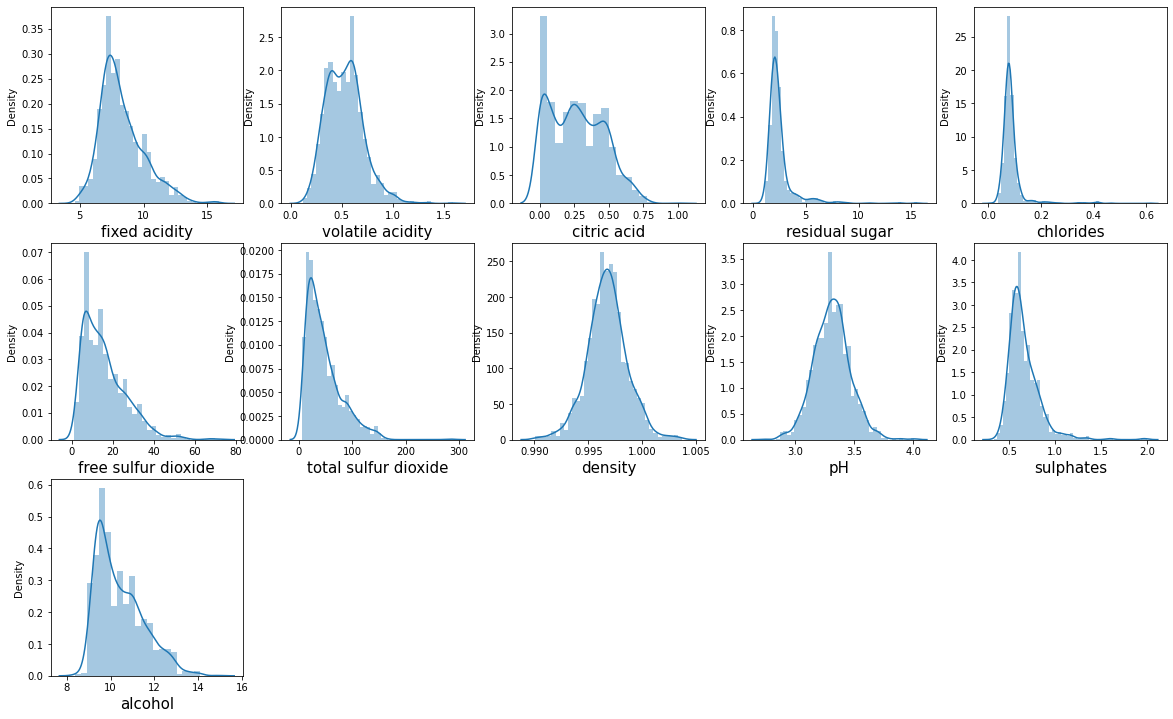

In [25]:
# Visualising data distribution for every column
plt.figure(figsize =(20,21),facecolor ='white')
plotnum = 1

for col in x:
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

    - Sulphates, fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, alchohol are all right skewed distributions.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

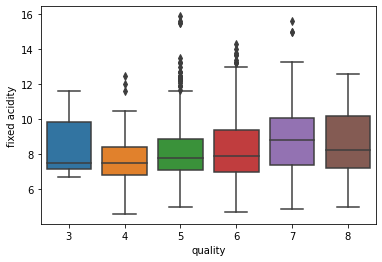

In [101]:
# Plot a boxplot to check for Outliers
# Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'fixed acidity', data = wine)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

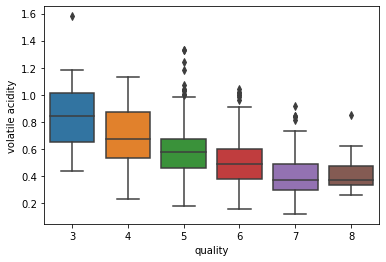

In [102]:
sns.boxplot('quality', 'volatile acidity', data = wine)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

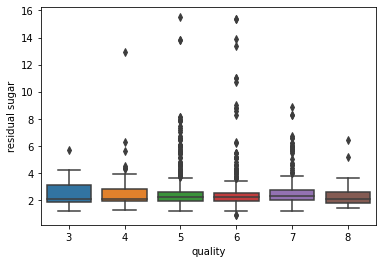

In [103]:
sns.boxplot('quality', 'residual sugar', data = wine)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='chlorides'>

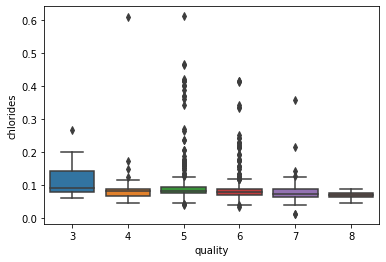

In [104]:
sns.boxplot('quality', 'chlorides', data = wine)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

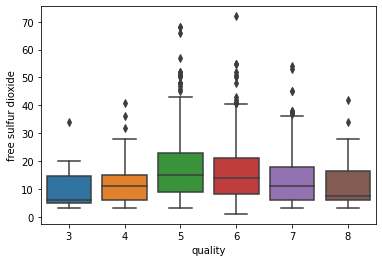

In [105]:
sns.boxplot('quality', 'free sulfur dioxide', data = wine)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='density'>

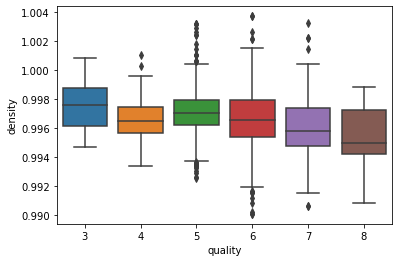

In [106]:
sns.boxplot('quality', 'density', data = wine)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='sulphates'>

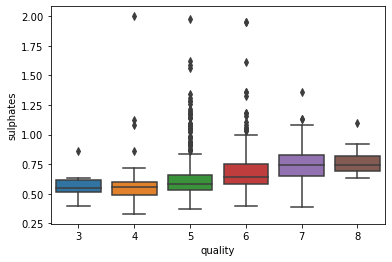

In [107]:
sns.boxplot('quality', 'sulphates', data = wine)

    #boxplots show many outliers for quite a few columns. Describe the dataset to get a better idea on what's happening
    #fixed acidity - 25% - 7.1 and 50% - 7.9. Not much of a variance. Could explain the huge number of outliers
    #volatile acididty - similar reasoning
    #citric acid - seems to be somewhat uniformly distributed
    #residual sugar - min - 0.9, max - 15!! Waaaaay too much difference. Could explain the outliers.
    #chlorides - same as residual sugar. Min - 0.012, max - 0.611
    #free sulfur dioxide, total suflur dioxide - same explanation as above

# Z score method to remove outliers

In [27]:
w= wine.copy()

from scipy.stats import zscore

zscor = zscore(w)
zabs = np.abs(zscor)
df = w[(zabs <3).all(axis=1)] #taking threshold value as 3
print(df.shape)

print(w.shape)

(1458, 12)
(1599, 12)


In [28]:
# Checking data loss in %

loss = (1599-1458)/1599*100
loss

8.818011257035648

    - 8.8% loss of data is acceptable

In [29]:
# Compare skewness
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

In [30]:
df.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                -0.159793
dtype: float64

In [31]:
# Reducing the skewness further
wine = df.copy()
feat = ['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']

skewdf = wine[feat].copy()

#Trying log transform method

for col in skewdf:
    skewdf[col] = np.log(skewdf[col])
skewdf.skew()

fixed acidity           0.377100
residual sugar          1.229070
chlorides               0.528828
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
sulphates               0.345344
alcohol                 0.588835
dtype: float64

In [33]:
# Trying power transfer method

from sklearn.preprocessing import PowerTransformer

powtrans = PowerTransformer(method = 'yeo-johnson', standardize = True)
df1 = wine[feat].copy()
df1.skew()

fixed acidity           0.820879
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
sulphates               0.893297
alcohol                 0.757396
dtype: float64

In [34]:
transformed = powtrans.fit_transform(df4)

transformed = pd.DataFrame(transformed, columns =df1.columns)
transformed.skew()

fixed acidity           0.019079
residual sugar         -0.003351
chlorides              -0.115179
free sulfur dioxide    -0.021273
total sulfur dioxide   -0.005751
sulphates               0.021132
alcohol                 0.108436
dtype: float64

In [35]:
skewdf.skew()

fixed acidity           0.377100
residual sugar          1.229070
chlorides               0.528828
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
sulphates               0.345344
alcohol                 0.588835
dtype: float64

    Comparing outputs of Log Transformer and Power Transformer method, it is determined that Power Transformer gives better result.

In [39]:
transformed.index = wine.index
wine[feat] = transformed[feat]
x = wine.drop(columns = ['quality'])
y = wine['quality']
x.skew()

fixed acidity           0.019079
volatile acidity        0.392097
citric acid             0.292600
residual sugar         -0.003351
chlorides              -0.115179
free sulfur dioxide    -0.021273
total sulfur dioxide   -0.005751
density                 0.055543
pH                      0.113039
sulphates               0.021132
alcohol                 0.108436
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

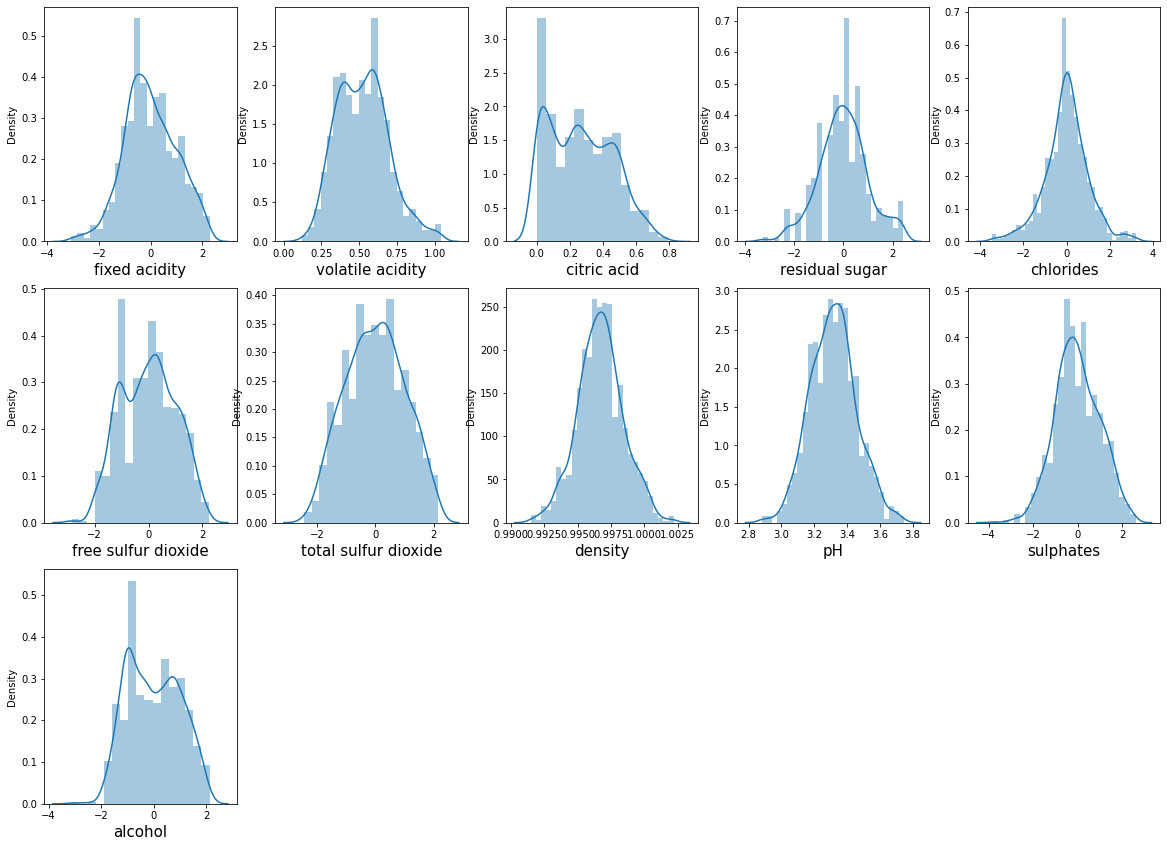

In [40]:
plt.figure(figsize =(20,25),facecolor ='white')
plotnum = 1

for col in x:
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

    -Distribution looks much more normalised now

# Split the features and label variables

In [113]:
x = wine.iloc[:,:11]
y = wine['Reviews']

In [114]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [115]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Reviews, dtype: object

   # Data Standardization

In [42]:
#scale the data using StandardScalar for PCA

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[-0.46910218,  1.0387081 , -1.38741253, ...,  1.37476832,
        -0.58823037, -1.11232895],
       [-0.17212704,  2.10132549, -1.38741253, ..., -0.82375195,
         0.45352708, -0.52685366],
       [-0.17212704,  1.39291389, -1.17821377, ..., -0.3982319 ,
         0.22198916, -0.52685366],
       ...,
       [-1.45195519, -0.0829436 , -0.70751654, ...,  0.73648824,
         0.9322481 ,  0.7428399 ],
       [-1.88631136,  0.71401945, -0.75981623, ...,  1.80028837,
         0.66861292, -0.03320546],
       [-1.77310975, -1.26362959,  1.07067297, ...,  0.52372821,
         0.30109116,  0.7428399 ]])

In [43]:
# Checking for Multicollinearity using Variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
vif

,Features,vif
0,fixed acidity,6.878090
1,volatile acidity,1.843893
2,citric acid,2.969303
3,residual sugar,1.687033
4,chlorides,1.264782
5,free sulfur dioxide,2.830927
6,total sulfur dioxide,3.159700
7,density,5.600673
8,pH,3.173526
9,sulphates,1.372701


# PCA

In [44]:
# perform PCA
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

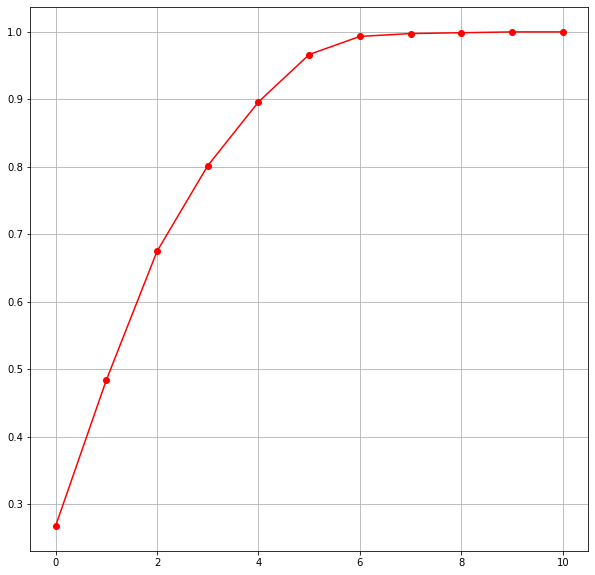

In [45]:
# plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()


### AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 
#### we shall pick the first 8 components for our prediction.


In [46]:
# PCA with 8 components for our prediction.
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(x)
x_new

array([[-0.19694243,  0.71791787,  1.24030223, ...,  0.43996057,
        -0.04106821, -0.19366464],
       [-1.68607427, -0.79832989, -0.18989896, ...,  0.16351266,
        -0.23245913, -0.38200569],
       [-0.87039798, -0.45864833,  0.24331083, ...,  0.21330711,
         0.14917114, -0.27524714],
       ...,
       [-0.86207684,  0.869296  , -1.51689074, ...,  0.08012323,
        -0.6414979 ,  0.04764785],
       [-1.33615204,  1.47507246, -0.81234096, ...,  0.28984494,
        -0.73473824,  0.01018267],
       [-0.48139881,  0.75591469, -1.47512032, ...,  0.94279727,
        -0.18526662,  0.4892006 ]])

#  Kbest feature selection

In [54]:
from sklearn.feature_selection import SelectKBest, f_classif

In [56]:
xbest = x.drop(columns = ['pH','residual sugar','fixed acidity'])

In [58]:
scaled_x = sc.fit_transform(xbest)

# Finding the best Random State

# Train Test Split

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .31, random_state=i)
    modRF = RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.8451327433628318 on Random State: 49


In [61]:
 x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = .30, random_state=i)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Data Modeling

#### Proceed with Modelling. We will use the following algorithms

    - Logistic Regression
    - Decision Trees
    - Naive Bayes
    - Random Forests
    - SVM
    - XGB
    - KNeighbour

In [62]:
LOGR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
XGBC = XGBClassifier()
SV = SVC()
KNN = KNeighborsClassifier()
LOGR.fit(x_train,y_train)
RFC.fit(x_train,y_train)
DTC.fit(x_train,y_train)
XGBC.fit(x_train,y_train)
SV.fit(x_train,y_train)
KNN.fit(x_train,y_train)

[20:06:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KNeighborsClassifier()

# Accuracy Score for each model


In [63]:
## Logistic Regression Model Accuracy
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)
conf_matrx = confusion_matrix(y_test,LOGRpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[139  54]
 [ 69 176]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.67      0.72      0.69       193
           1       0.77      0.72      0.74       245

    accuracy                           0.72       438
   macro avg       0.72      0.72      0.72       438
weighted avg       0.72      0.72      0.72       438



In [64]:
# Random Forest Classifier Model Accuracy

RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)
conf_matrx = confusion_matrix(y_test,RFCpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[154  39]
 [ 63 182]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.71      0.80      0.75       193
           1       0.82      0.74      0.78       245

    accuracy                           0.77       438
   macro avg       0.77      0.77      0.77       438
weighted avg       0.77      0.77      0.77       438



In [65]:
# Decision Tree Classifier Model Accuracy
DTCpred = DTC.predict(x_test)
accu = classification_report(y_test,DTCpred)
conf_matrx = confusion_matrix(y_test,DTCpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[136  57]
 [ 64 181]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.68      0.70      0.69       193
           1       0.76      0.74      0.75       245

    accuracy                           0.72       438
   macro avg       0.72      0.72      0.72       438
weighted avg       0.73      0.72      0.72       438



In [66]:
# XGB Classifier Model Accuracy
XGBCpred = XGBC.predict(x_test)
accu = classification_report(y_test,XGBCpred)
conf_matrx = confusion_matrix(y_test,XGBCpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[151  42]
 [ 62 183]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.71      0.78      0.74       193
           1       0.81      0.75      0.78       245

    accuracy                           0.76       438
   macro avg       0.76      0.76      0.76       438
weighted avg       0.77      0.76      0.76       438



In [67]:
# SV Classifier Model Accuracy
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[150  43]
 [ 73 172]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.67      0.78      0.72       193
           1       0.80      0.70      0.75       245

    accuracy                           0.74       438
   macro avg       0.74      0.74      0.73       438
weighted avg       0.74      0.74      0.74       438



In [68]:
# KNeighbors Classifier Model Accuracy
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)
conf_matrx = confusion_matrix(y_test,KNNpred)

print(" Confusion Matrix:" , conf_matrx)
print("Accuracy Score:" ,accu)

 Confusion Matrix: [[143  50]
 [ 67 178]]
Accuracy Score:               precision    recall  f1-score   support

           0       0.68      0.74      0.71       193
           1       0.78      0.73      0.75       245

    accuracy                           0.73       438
   macro avg       0.73      0.73      0.73       438
weighted avg       0.74      0.73      0.73       438



# Model Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score as cvs

#Decision Tree Classifier
print("Decision Tree Classifier:" ,cvs(DTC,scaled_x,y,cv=5).mean())

#Logistic Regression
print("Logistic Regression:",cvs(LOGR,scaled_x,y,cv=5).mean())

# Random Forest Classifier
print(" Random Forest Classifier:",cvs(RFC,scaled_x,y,cv=5).mean())

#XGB Classifier
print("XGB Classifier:",cvs(XGBC,scaled_x,y,cv=5).mean())

# SV Classifier
print("SV Classifier:",cvs(SV,scaled_x,y,cv=5).mean())

#K Nearest Neighnors Classifier
print("K Nearest Neighnors Classifier:",cvs(KNN,scaled_x,y,cv=5).mean())

Decision Tree Classifier: 0.6618580238196111
Logistic Regression: 0.7215412135762369
 Random Forest Classifier: 0.7119309890316811
[20:15:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:15:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[20:15:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:15:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:15:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Classifier: 0.6872452101868852
SV Classifier: 0.7174292708186226
K Nearest Neighnors Classifier: 0.687214611872146


#### Based on comapring accuracy score results with cross validation results, it is determined that logistic regression is the best model.
# ROC AUC Scores

In [72]:
# Decision Tree Classifier
print("Decision Tree Classifier:",roc_auc_score(y_test,DTCpred))

#Logistic Regression
print("Logistic Regression:" ,roc_auc_score(y_test,LOGRpred))

#Random Forest Classifier
print("Random Forest Classifier:",roc_auc_score(y_test,RFCpred))

#XGB Classifier
print("XGB Classifier:",roc_auc_score(y_test,XGBCpred))

#SV Classifier
print("SV Classifier:",roc_auc_score(y_test,SVpred))

#K Nearest Neighbors Classifier
print("K Nearest Neighbors Classifier:",roc_auc_score(y_test,KNNpred))



Decision Tree Classifier: 0.7217193613196575
Logistic Regression: 0.719287300412393
Random Forest Classifier: 0.7703923019985196
XGB Classifier: 0.7646610975996616
SV Classifier: 0.7396214444326954
K Nearest Neighbors Classifier: 0.7337316273659722


#### Random Forest Classifier is the best model for the dataset with score 78%

# ROC AUC Curves

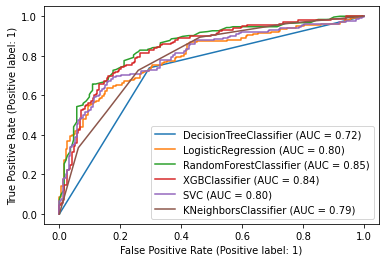

In [73]:

disp = plot_roc_curve(DTC,x_test,y_test)
mod = [LOGR,RFC,XGBC,SV,KNN]

for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()


#### Best on above graph, Random Forest Classifier is the best model for the dataset with AUC score 0.85
# Hyper Parameter Tuning
## RandomForest Classifier

In [74]:
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}
Gridcv = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
Gridcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]})

In [75]:
Gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 80,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 50}

In [76]:
Best_mod = RandomForestClassifier(n_estimators = 60,criterion = 'entropy', max_depth= 60, max_features = 'log2',min_samples_leaf = 5, min_samples_split = 5)
Best_mod.fit(x_train,y_train)
rfpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)

76.9406392694064


In [77]:
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

array([[153,  40],
       [ 61, 184]], dtype=int64)

 ## Logistic Regression

In [78]:
parameter = {'penalty':['l1', 'l2', 'elasticnet', 'none'],'dual': [True,False],'fit_intercept':[True,False],'random_state':[1,2,5,10,20],'solver':['liblinear'],'max_iter':[100,200],'multi_class':['auto', 'ovr', 'multinomial']}
GridCV = GridSearchCV(LogisticRegression(),parameter,cv=5,n_jobs = -1)
GridCV.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan 0.73921569
 0.73921569 0.73921569 0.73921569 0.73921569        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 0.73921569 0.73921569 0.73921569 0.73921569 0.73921569
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan 0.73921569
 0.73921569 0.73921569 0.73921569 0.73921569        nan        nan
        nan        nan        nan        nan        n

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [100, 200],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [1, 2, 5, 10, 20],
                         'solver': ['liblinear']})

In [79]:
GridCV.best_params_

{'dual': True,
 'fit_intercept': True,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'liblinear'}

In [80]:
Best_mod2 = LogisticRegression(dual = True,fit_intercept = True,max_iter = 100,multi_class = 'auto', penalty = 'l2',random_state= 1,solver = 'liblinear')
Best_mod2.fit(x_train,y_train)
lrpred = Best_mod2.predict(x_test)
acc = accuracy_score(y_test,lrpred)
print(acc*100)

71.91780821917808


In [81]:
conf_matrx = confusion_matrix(y_test,lrpred)
conf_matrx

array([[139,  54],
       [ 69, 176]], dtype=int64)

In [82]:
roc_auc_score(y_test,rfpred)

0.7718832610764514

In [83]:
roc_auc_score(y_test,lrpred)

0.719287300412393

#### On comparing the accuracies and ROC AUC scores of the Random Forest Classifier Model and Logistic Regression Model, it is determined that Random Forest Classifier Model is better.

### Random Forest Classifier also has better Confusion matrix performance than Logistic Regression

# Save the Model

In [84]:
import joblib
joblib.dump(Best_mod,"Best_Wine.pkl")


['Best_Wine.pkl']

# Load Model


In [85]:
mod = joblib.load("Best_Wine.pkl")
print(mod.predict(x_test))

[1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0
 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0
 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1
 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0
 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1
 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0
 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1]


In [86]:
# Predicting some of the X_test results and matching it with true i.e. y_test values using Random Forest.

a = np.array(y_test)
predicted = np.array(mod.predict(x_test))
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,0,1
1,1,1
2,1,1
3,1,0
4,0,0
...,...,...
433,1,1
434,0,0
435,0,0
436,0,0


### As we can see, the predicted and the true values matches almost 80%.

![cheers](https://c.tenor.com/9jlpyRay37cAAAAM/neil-diamond-red-red-wine.gif)
## Woohoo! Congratulations!!! We can now work on more Machine Learning Projects while drinking a Good Quality Wine !! YAY!